In [1]:
# Calculate error, runtime
import numpy
import time
import matplotlib.pyplot as plt

def calculate_epsilon(gamma):
    return numpy.log((0.5 + gamma) / (0.5 - gamma))

def calculate_variance(total_rows, gamma):
    return total_rows / (16 * (gamma**2))

def percentage_error(result_true, result_perturbed):
    return numpy.abs((result_true.values - result_perturbed.values) / result_true.values).mean() * 100

def plot_experiment(epsilons, error, runtimes, title=''):
    plt.style.use('default')
    # Plot Epsilon
    fig,ax= plt.subplots()
    plt.style.use('ggplot')
    ax.scatter(epsilons, error);
    ax.set_title(f"Epsilon versus Error {title}")
    ax.set_xlabel('Epsilon')
    ax.set_ylabel('Error')
    # Plot Time
    fig,ax= plt.subplots()
    plt.style.use('ggplot')
    ax.scatter(epsilons, runtimes)
    ax.set_title(f"Epsilon versus Runtime {title}")
    ax.set_xlabel('Epsilon')
    ax.set_ylabel('Runtime')

      

In [2]:
error = {
    'damage_grade_new_construction': [],
    'intensity_earthquake_damage_vdc': [],
    'poverty_vdc': [],
    'followup_poverty': [],
    'followup_gender': []
}
runtimes = {
    'damage_grade_new_construction': [],
    'intensity_earthquake_damage_vdc': [],
    'poverty_vdc': [],
    'followup_poverty': [],
    'followup_gender': []
}
epsilons = []
gammas = []

# True results
global gamma
gamma = 0.5
%run ./earthquake-2015-base.ipynb
damage_grade_new_construction = histogram(households, 'damage_grade', 'new_construction')
followup_poverty = histogram(households, 'condition_post_eq', 'poverty')
followup_gender = histogram(households, 'condition_post_eq', 'female_headed')
intensity_earthquake_damage_vdc = buildings.groupby(['vdcmun_id'])['damage_grade_numeric'].mean()
poverty_vdc = households[households['poverty']].groupby(['vdcmun_id_x'])['poverty'].size()


for g in numpy.arange(0.0, 0.5, 0.05):
    gamma = g
    epsilon = calculate_epsilon(gamma)
    for n in range(10):
        # Perturb data
        %run ./earthquake-2015-base.ipynb
        
        epsilons.append(epsilon)
        gammas.append(gamma)
        
        start_time = time.time()
        damage_grade_new_construction_p = histogram(households, 'damage_grade_p', 'new_construction_p')
        runtimes['damage_grade_new_construction'].append(time.time() - start_time)
        error['damage_grade_new_construction'].append(percentage_error(damage_grade_new_construction, damage_grade_new_construction_p))
        
        start_time = time.time()
        followup_poverty_p = histogram(households, 'condition_post_eq_p', 'poverty_p')
        runtimes['followup_poverty'].append(time.time() - start_time)
        error['followup_poverty'].append(percentage_error(followup_poverty, followup_poverty_p))
        
        start_time = time.time()
        followup_gender_p = histogram(households, 'condition_post_eq_p', 'female_headed_p')
        runtimes['followup_gender'].append(time.time() - start_time)
        error['followup_gender'].append(percentage_error(followup_gender, followup_gender_p))
        
        start_time = time.time()
        intensity_earthquake_damage_vdc_p = buildings.groupby(['vdcmun_id'])['damage_grade_numeric_p'].mean()
        runtimes['intensity_earthquake_damage_vdc'].append(time.time() - start_time)
        error['intensity_earthquake_damage_vdc'].append(percentage_error(intensity_earthquake_damage_vdc, intensity_earthquake_damage_vdc_p))

        start_time = time.time()
        poverty_vdc_p = households[households['poverty_p']].groupby(['vdcmun_id_x'])['poverty_p'].size()
        runtimes['poverty_vdc'].append(time.time() - start_time)
        error['poverty_vdc'].append(percentage_error(poverty_vdc, poverty_vdc_p))
        

Using gamma = 0.5
Using gamma = 0.0
Using gamma = 0.0
Using gamma = 0.0
Using gamma = 0.0
Using gamma = 0.0
Using gamma = 0.0
Using gamma = 0.0
Using gamma = 0.0
Using gamma = 0.0
Using gamma = 0.0
Using gamma = 0.05
Using gamma = 0.05
Using gamma = 0.05
Using gamma = 0.05
Using gamma = 0.05
Using gamma = 0.05
Using gamma = 0.05
Using gamma = 0.05
Using gamma = 0.05
Using gamma = 0.05
Using gamma = 0.1
Using gamma = 0.1
Using gamma = 0.1
Using gamma = 0.1
Using gamma = 0.1
Using gamma = 0.1
Using gamma = 0.1
Using gamma = 0.1
Using gamma = 0.1
Using gamma = 0.1
Using gamma = 0.15000000000000002
Using gamma = 0.15000000000000002
Using gamma = 0.15000000000000002
Using gamma = 0.15000000000000002
Using gamma = 0.15000000000000002
Using gamma = 0.15000000000000002
Using gamma = 0.15000000000000002
Using gamma = 0.15000000000000002
Using gamma = 0.15000000000000002
Using gamma = 0.15000000000000002
Using gamma = 0.2
Using gamma = 0.2
Using gamma = 0.2
Using gamma = 0.2
Using gamma = 0.2
Us

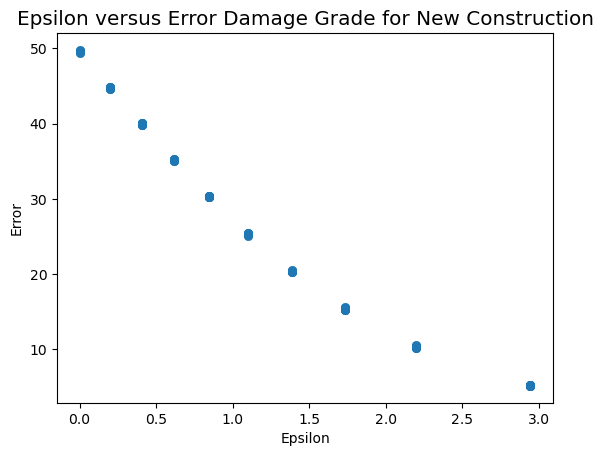

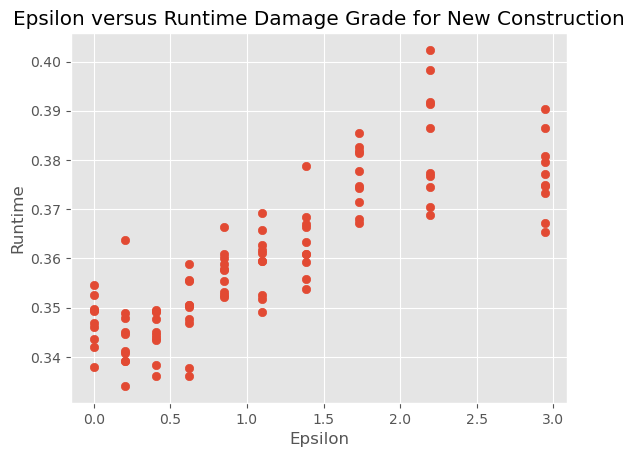

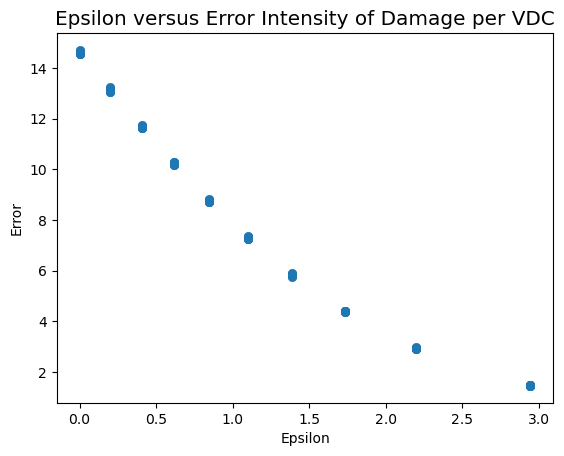

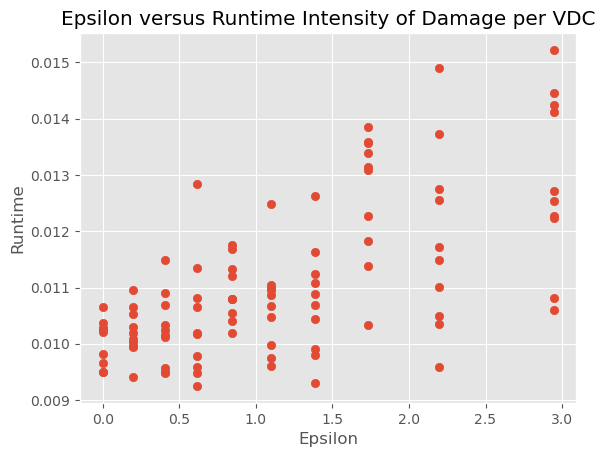

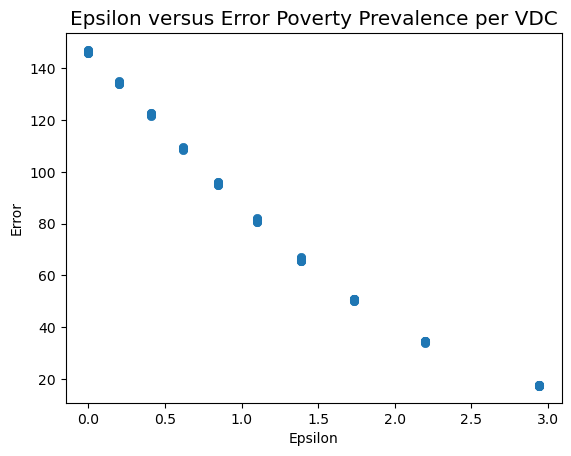

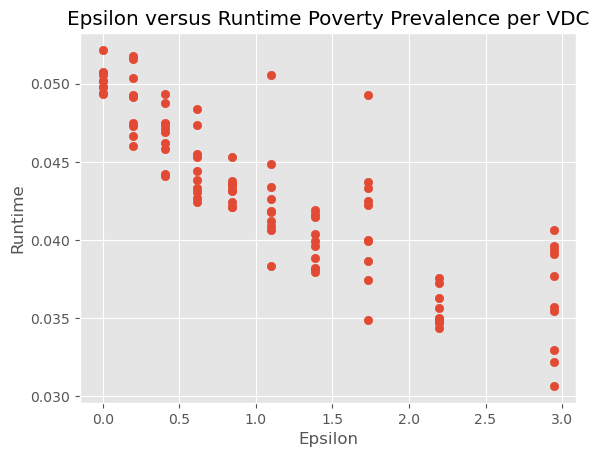

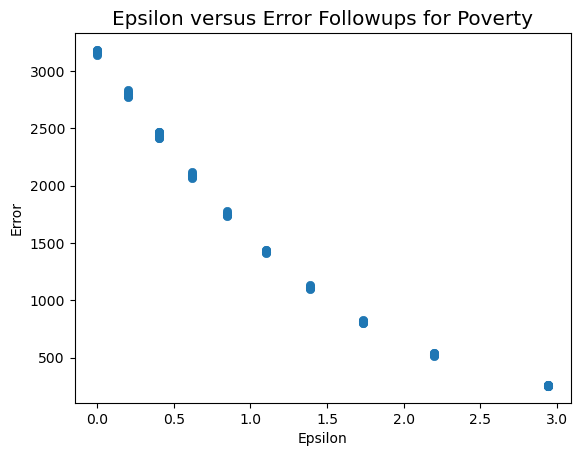

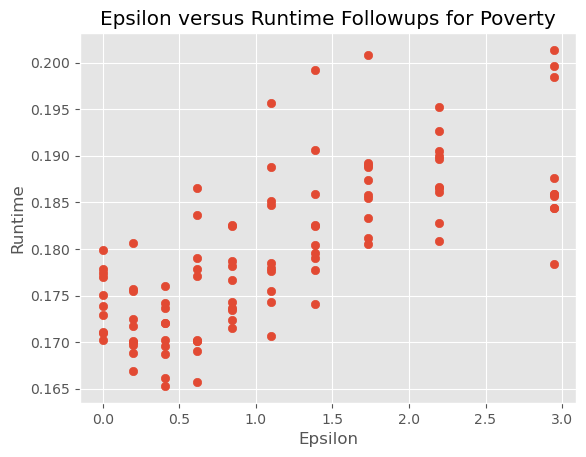

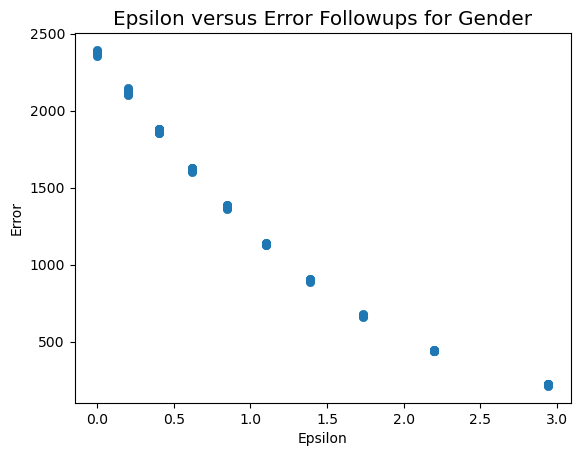

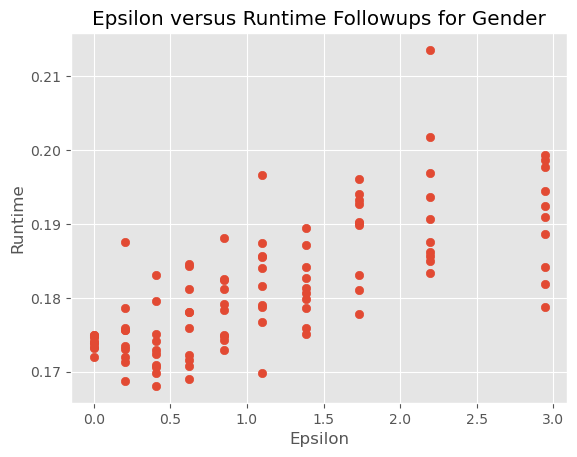

In [3]:
plot_experiment(epsilons, error['damage_grade_new_construction'], runtimes['damage_grade_new_construction'], 'Damage Grade for New Construction')
plot_experiment(epsilons, error['intensity_earthquake_damage_vdc'], runtimes['intensity_earthquake_damage_vdc'], 'Intensity of Damage per VDC')
plot_experiment(epsilons, error['poverty_vdc'], runtimes['poverty_vdc'], 'Poverty Prevalence per VDC')
plot_experiment(epsilons, error['followup_poverty'], runtimes['followup_poverty'], 'Followups for Poverty')
plot_experiment(epsilons, error['followup_gender'], runtimes['followup_gender'], 'Followups for Gender')